In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [7]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

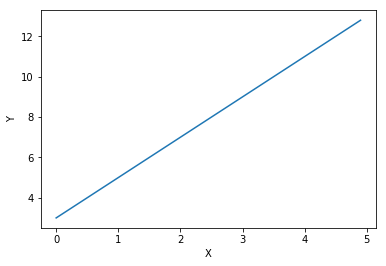

In [9]:
a = 2
b = 3
Y = a * X + b

plt.plot(X,Y)
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

# Linear Regression with Tensorflow

In [11]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [12]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

In [13]:
print(train_x)
print(train_y)

[[2. ]
 [2.4]
 [1.5]
 ...
 [3. ]
 [3.2]
 [3.2]]
[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


In [14]:
a = tf.Variable(31.0)
b = tf.Variable(8.0)
y = a * train_x + b

In [15]:
loss = tf.reduce_mean(tf.square(y - train_y))
optimizer = tf.train.GradientDescentOptimizer(0.005)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [16]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 21956.887 35.997917 9.444935
5 6924.2964 52.1586 14.40359
10 3600.7283 59.632366 17.130316
15 2851.197 63.034103 18.807772
20 2667.7363 64.527435 19.990454
25 2608.9685 65.12675 20.93835
30 2577.8694 65.30764 21.773378
35 2553.1116 65.29305 22.55271
40 2529.9993 65.18753 23.303179
45 2507.5005 65.04008 24.037376
50 2485.382 64.87366 24.76123
55 2463.5903 64.69904 25.477537
60 2442.112 64.52127 26.18763
65 2420.9365 64.342705 26.892149
70 2400.061 64.16443 27.591415
75 2379.4822 63.98697 28.2856
80 2359.1938 63.81055 28.974796
85 2339.1929 63.635292 29.659075
90 2319.4749 63.46123 30.33848
95 2300.0369 63.288383 31.013054


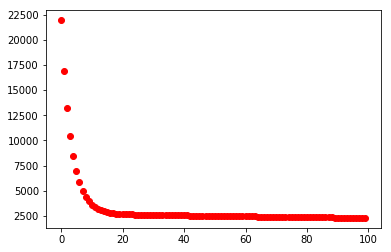

In [17]:
plt.plot(loss_values, 'ro')